In [58]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

conn = sqlite3.connect("../db/balatasar_read_copy.db")
def sql(query):
    #print(query)
    return pd.read_sql_query(query, conn)

In [40]:
df_price = sql('''
SELECT
    Price.token, min(date) as tradedOn
FROM
    Price
WHERE Price.token in (SELECT DISTINCT token FROM ETransfer)
GROUP BY Price.token
''')

In [42]:
df_block = sql('''
SELECT 
    token, timestamp
FROM
    (SELECT
        token, min(blocknumber) as blocknumber
    FROM
        ETransfer
    GROUP BY token) m
    NATURAL JOIN
    ETransfer
GROUP BY m.token
''')

/root/miniconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([736208., 736330., 736450., 736573., 736695., 736815., 736938.,
        737060., 737180., 737303.]), <a list of 10 Text xticklabel objects>)

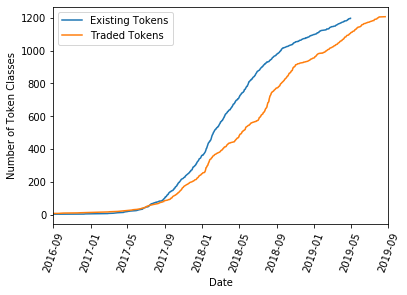

In [43]:
from datetime import date
df_block['cnt'] = 1
df_price['cnt'] = 1
df_price["date"] = pd.to_datetime(df_price["tradedOn"], unit='s')
df_block["date"] = pd.to_datetime(df_block["timestamp"], unit='s')

emittedOn = df_block[['cnt', 'date']].sort_values(by='date')
emittedOn['sum'] = emittedOn['cnt'].cumsum()

tradedOn = df_price[['cnt', 'date']].sort_values(by='date')
tradedOn['sum'] = tradedOn['cnt'].cumsum()



In [59]:
entities = sql('''
SELECT day, count(*) as cnt
FROM
    (SELECT 
        `to`, cast(min(timestamp) as int) / 86400 * 86400 as day
    FROM
        Transfer
    GROUP BY `to`)
GROUP BY day
ORDER BY day
''')

In [48]:
transfers = sql('''
SELECT
    day, sum(numTransfers) as cnt
FROM
    (SELECT
        blocknumber, count(*) as numTransfers, cast(timestamp as int) / 86400 * 86400 as day
    FROM
        Transfer
    GROUP BY blocknumber)
GROUP BY day
''')

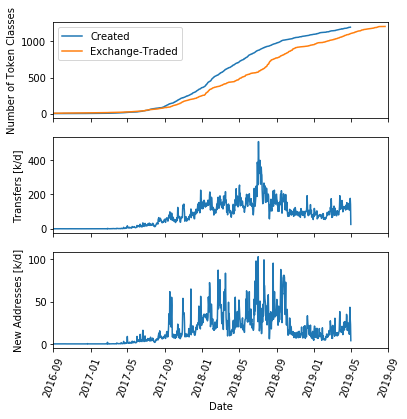

In [100]:
transfers["date"] = pd.to_datetime(transfers["day"], unit='s')
transfers["cnt_k"] = transfers["cnt"] / 1000
entities["date"] = pd.to_datetime(entities["day"], unit='s')
entities["cnt_k"] = entities["cnt"] / 1000

f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
fig = plt.gcf()
fig.set_size_inches(6, 6)
sns.lineplot(x=emittedOn['date'], y=emittedOn['sum'], ax=ax1)
g = sns.lineplot(x=tradedOn['date'], y=tradedOn['sum'], ax=ax1)
g.legend(title='', loc='upper left', labels=['Created', 'Exchange-Traded'])
g.set_xlim(date.fromisoformat("2016-09-01"), date.fromisoformat("2019-09-01"))
g.set_ylabel('Number of Token Classes')
g.set_xlabel('Date')
plt.xticks(rotation=70)

#plt.subplot(132)
g = sns.lineplot(x=transfers['date'], y=transfers['cnt_k'], ax=ax2)
#g.set_xlim(date.fromisoformat("2016-09-01"), date.fromisoformat("2019-05-15"))
g.set_ylabel('Transfers [k/d]')
g.set_xlabel('Date')
#plt.xticks(rotation=10)

#plt.subplot(133)
g = sns.lineplot(x=entities['date'], y=entities['cnt_k'], ax=ax3)
#g.set_xlim(date.fromisoformat("2016-09-01"), date.fromisoformat("2019-05-15"))
g.set_ylabel('New Addresses [k/d]')
g.set_xlabel('Date')
#plt.xticks(rotation=70)
plt.savefig('graphs/overview_fig.pdf')

In [103]:
sql('''SELECT token, count(*) FROM ICOaddress GROUP BY token''')

,token,count(*)
0,0chain,10
1,0x,4
2,0xbtc,12
3,0xcert,2
4,1world,4
5,aave,9
6,abcc-token,1
7,abyss-token,1
8,ace,2
9,acute-angle-cloud,4


In [98]:
df_price[df_price['date'] < '2019-05-01']


,token,tradedOn,cnt,date
0,0chain,1530489600,1,2018-07-02
1,0x,1502841600,1,2017-08-16
2,0xbtc,1528070400,1,2018-06-04
3,0xcert,1531353600,1,2018-07-12
4,1irstcoin,1554681600,1,2019-04-08
5,1sg,1551052800,1,2019-02-25
6,1world,1521590400,1,2018-03-21
7,4new,1534896000,1,2018-08-22
8,aave,1512000000,1,2017-11-30
9,abcc-token,1540252800,1,2018-10-23


In [109]:
sql('''SELECT * FROM Address WHERE isExchange in (1,2) LIMIT 10''')

,address,name,url,isExchange,isDepositAddress,isCappReceiver,isCappSender,isCappStorage,isCappOther,isOriginAddress,cluster
0,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,Binance 7,https://www.binance.com,1,0,0,0,0,0,0,0x145c9d4565e8291caa8ec92fefb571e1315e744b-capp
